<a href="https://colab.research.google.com/github/jmacedo91/Data-Analysis-Projects/blob/main/Data_Analysis_World_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>Data Analysis - World Population</font>
***

# <font color=green>1. KNOWING THE DATA</font>
***

In this first step we are going to use the pandas library to load our data and present it in a DataFrame.

## <font color=green>Importing the Libraries</font>
***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7.5))

## <font color=green>Importing the Dataset</font>
***

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/World Population.csv')

In [4]:
dataset.head(10)

,Rank,Country,Region,Population,Percentage,Date
0,1,China,Asia,1411778724,17.80%,20-Nov
1,2,India,Asia,1386141732,17.50%,21-Dec
2,3,United States,Americas,332960297,4.20%,21-Dec
3,4,Indonesia,Asia,271350000,3.43%,20-Dec
4,5,Pakistan,Asia,225200000,2.84%,21-Jul
5,6,Brazil,Americas,214143381,2.70%,21-Dec
6,7,Nigeria,Africa,211401000,2.67%,21-Jul
7,8,Bangladesh,Asia,171950056,2.17%,21-Dec
8,9,Russia,"Europe,Asia",146171015,1.85%,21-Jan
9,10,Mexico,Americas,126014024,1.59%,20-Mar


In [5]:
x = []
for i in range(dataset.shape[0]):
  x.append(i + 1)

In [6]:
dataset.rename(columns = {'Percentage': 'World Percentage'}, inplace = True)
dataset = dataset.drop(columns=['Rank', 'Date'])
dataset.index = x
dataset.columns.name = 'World Rank'
dataset['World Percentage'] = ((dataset['Population'] / dataset['Population'].sum()) * 100).round(2)
dataset.head()


World Rank,Country,Region,Population,World Percentage
1,China,Asia,1411778724,18.12
2,India,Asia,1386141732,17.80
3,United States,Americas,332960297,4.27
4,Indonesia,Asia,271350000,3.48
5,Pakistan,Asia,225200000,2.89


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 241
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           241 non-null    object 
 1   Region            241 non-null    object 
 2   Population        241 non-null    int64  
 3   World Percentage  241 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ KB


In [8]:
data_types = pd.DataFrame(dataset.dtypes, columns = ['Data Types'])

In [9]:
data_types.index.name = ''
data_types

,Data Types
,
Country,object
Region,object
Population,int64
World Percentage,float64


In a preliminary analysis we can recognize the variables of our dataset.

The dataset has 6 columns described as following:

- **Rank:** Country rank by population

- **Country:** Country name

- **Region:** Country region

- **Population:** Country population

- **Percentage:** Percentage of population worldwide

- **Date:** Date when population was measured

In [10]:
print('The database features records from {} countries in {} variables.'.format(dataset.shape[0], dataset.shape[1]))


The database features records from 241 countries in 4 variables.


## <font color=green>Data collection</font>
***

This Data uses material from (https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population ) which is released under the Creative Commons Attribution-Share-Alike License 3.0

# <font color=green>2. QUESTIONS TO BE ANSWERED</font>
***

- What is the population of each region ?
- Which country has the most population in each region ?
- What is the percentage of the first 10 countries ?

## <font color=green>2.1. What is the population of each region?</font>
***

To investigate the total population of each region, we first have to define each type of region and identify the groups of countries belonging to the bloc.

In [11]:
regions = pd.DataFrame(dataset.Region.unique(), columns = ['Region'])
regions.columns.name = 'Id'
regions

Id,Region
0,Asia
1,Americas
2,Africa
3,"Europe,Asia"
4,"Asia,Europe"
5,Europe
6,Oceania


In [12]:
regional_populations = pd.DataFrame(dataset.groupby('Region')['Population'].sum().sort_values(ascending = False))
regional_populations

,Population
Region,
Asia,4545166611
Africa,1345290019
Americas,1024609723
Europe,600873091
"Europe,Asia",146171015
"Asia,Europe",83614362
Oceania,43609090


Text(0, 0.5, 'Population')

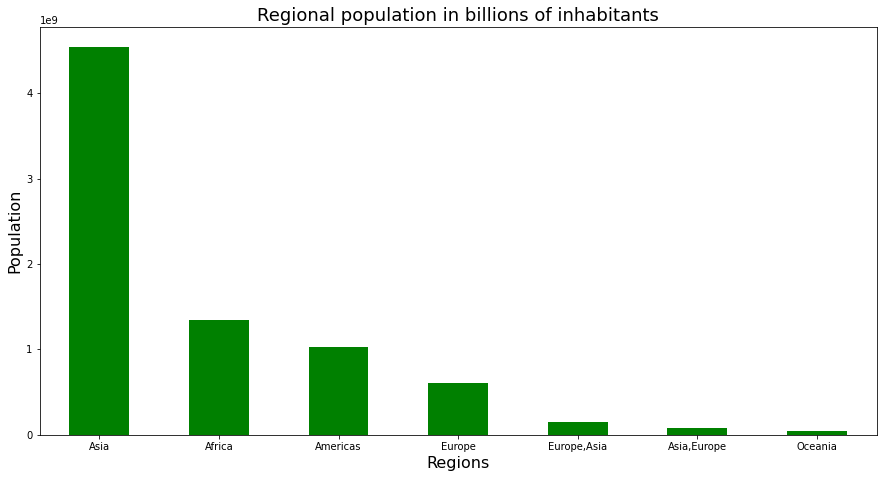

In [13]:
fig = regional_populations['Population'].plot.bar(x = regional_populations.index, color = 'green', rot = 0)
fig.set_title('Regional population in billions of inhabitants', fontsize = 18)
fig.set_xlabel('Regions', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)


## <font color=green>2.2. Which country has the most population in each region ?</font>
***

### <font color=green>a. Asia</font>
***

In [14]:
data_asia = dataset[dataset['Region'].isin(['Asia'])]

In [15]:
x = []
for i in range(data_asia.shape[0]):
  x.append(i + 1)

In [16]:
data_asia.index = x
data_asia.columns.name = 'Rank Asia'
data_asia['Asia Percentage'] = ((data_asia['Population'] / data_asia['Population'].sum()) * 100).round(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data_asia.head()

Rank Asia,Country,Region,Population,World Percentage,Asia Percentage
1,China,Asia,1411778724,18.12,31.06
2,India,Asia,1386141732,17.80,30.50
3,Indonesia,Asia,271350000,3.48,5.97
4,Pakistan,Asia,225200000,2.89,4.95
5,Bangladesh,Asia,171950056,2.21,3.78


In [18]:
data_asia.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Asia Population.csv', index = False)

Text(0, 0.5, 'Population')

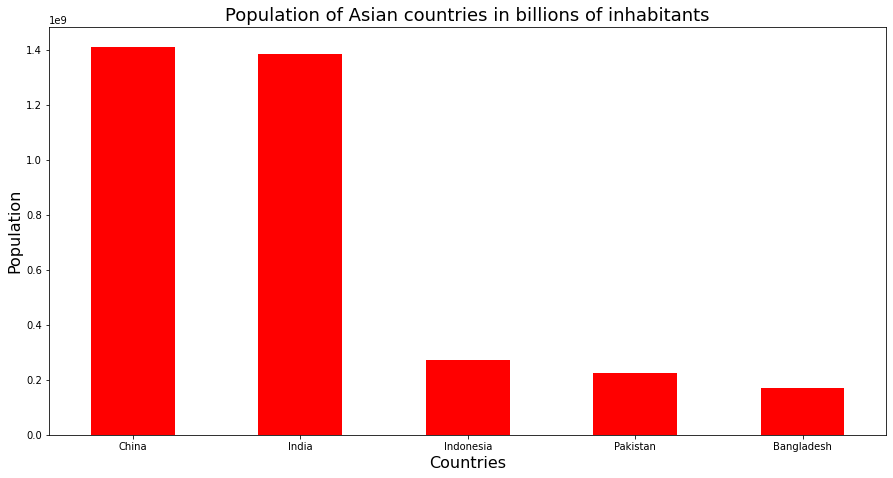

In [19]:
data_asia_plot = data_asia.set_index(data_asia.Country)
fig = data_asia_plot['Population'].iloc[:5].plot.bar(color = 'red', rot = 0)
fig.set_title('Population of Asian countries in billions of inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

<font size = 5>We can see that China and India have approximately the same number of inhabitants. They are two countries with large populations corresponding to more than 60% of the Asian continent and more than 30% of the world population. The countries that follow the top 5 Asian (Indonesia, Pakistan and Bangladesh) have remarkable population values ​​when compared worldwide, but when compared to the most populous countries in Asia, we observe that the difference is very large.</font>

### <font color=green>b. Americas</font>
***

In [20]:
data_americas = dataset[dataset['Region'].isin(['Americas'])]

In [21]:
x = []
for i in range(data_americas.shape[0]):
  x.append(i + 1)

In [22]:
data_americas.index = x
data_americas.columns.name = 'Rank Americas'
data_americas['Americas Percentage'] = ((data_americas['Population'] / data_americas['Population'].sum()) * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
data_americas.head()

Rank Americas,Country,Region,Population,World Percentage,Americas Percentage
1,United States,Americas,332960297,4.27,32.50
2,Brazil,Americas,214143381,2.75,20.90
3,Mexico,Americas,126014024,1.62,12.30
4,Colombia,Americas,51049498,0.66,4.98
5,Argentina,Americas,45808747,0.59,4.47


In [24]:
data_americas.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Americas Population.csv', index = False)

Text(0, 0.5, 'Population')

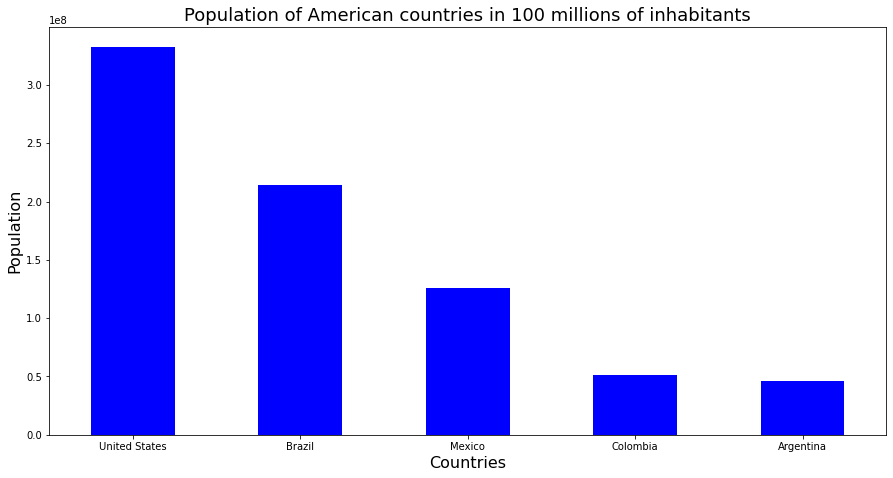

In [25]:
data_americas_plot = data_americas.set_index(data_americas.Country)
fig = data_americas_plot['Population'].iloc[:5].plot.bar(color = 'blue', rot = 0)
fig.set_title('Population of American countries in 100 millions of inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

<font size = 5>In the above distribution, we can see that the United States and Brazil have a little more than 50% of the population of the Americas.</font>

### <font color=green>c. Africa</font>
***

In [26]:
data_africa = dataset[dataset['Region'].isin(['Africa'])]

In [27]:
x = []
for i in range(data_africa.shape[0]):
  x.append(i + 1)

In [28]:
data_africa.index = x
data_africa.columns.name = 'Rank Africa'
data_africa['Africa Percentage'] = ((data_africa['Population'] / data_africa['Population'].sum()) * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
data_africa.head()

Rank Africa,Country,Region,Population,World Percentage,Africa Percentage
1,Nigeria,Africa,211401000,2.71,15.71
2,Ethiopia,Africa,117876000,1.51,8.76
3,Egypt,Africa,102741996,1.32,7.64
4,DR Congo,Africa,92378000,1.19,6.87
5,SouthAfrica,Africa,60142978,0.77,4.47


In [30]:
data_africa.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Africa Population.csv', index = False)

Text(0, 0.5, 'Population')

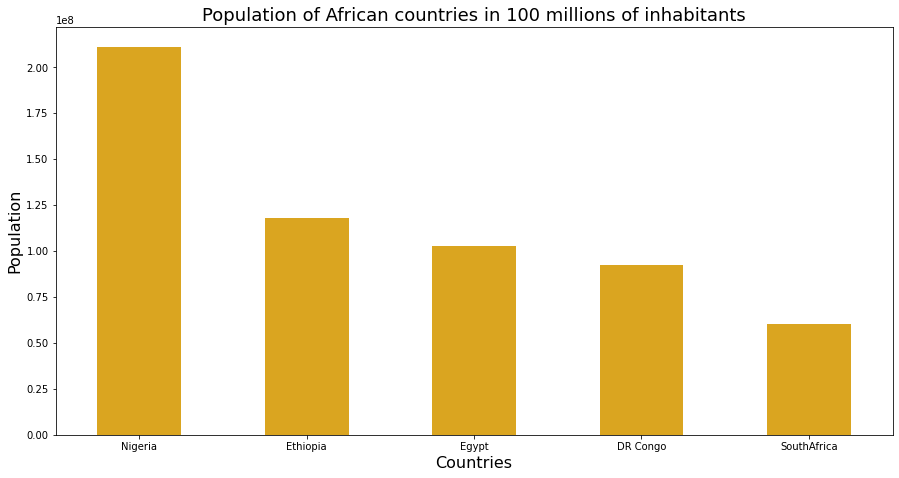

In [31]:
data_africa_plot = data_africa.set_index(data_africa.Country)
fig = data_africa_plot['Population'].iloc[:5].plot.bar(color = '#DAA520', rot = 0)
fig.set_title('Population of African countries in 100 millions of inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

<font size = 5>On the African continent, the country with the highest population is Nigeria, with almost double the population of the second place (Ethiopia), Nigeria also stands out for being one of the great economic powers in Africa</font>

### <font color=green>d. Europe / Asia</font>
***

In [32]:
data_eu_asia = dataset[dataset['Region'].isin(['Europe,Asia'])]

In [33]:
x = []
for i in range(data_eu_asia.shape[0]):
  x.append(i + 1)

In [34]:
data_eu_asia.index = x
data_eu_asia.columns.name = 'Rank Eu/Asia'
data_eu_asia['Eu/Asia Percentage'] = ((data_eu_asia['Population'] / data_eu_asia['Population'].sum()) * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
data_eu_asia.head()

Rank Eu/Asia,Country,Region,Population,World Percentage,Eu/Asia Percentage
1,Russia,"Europe,Asia",146171015,1.88,100.0


In [36]:
data_eu_asia.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Europe-Asia Population.csv', index = False)

Text(0, 0.5, 'Population')

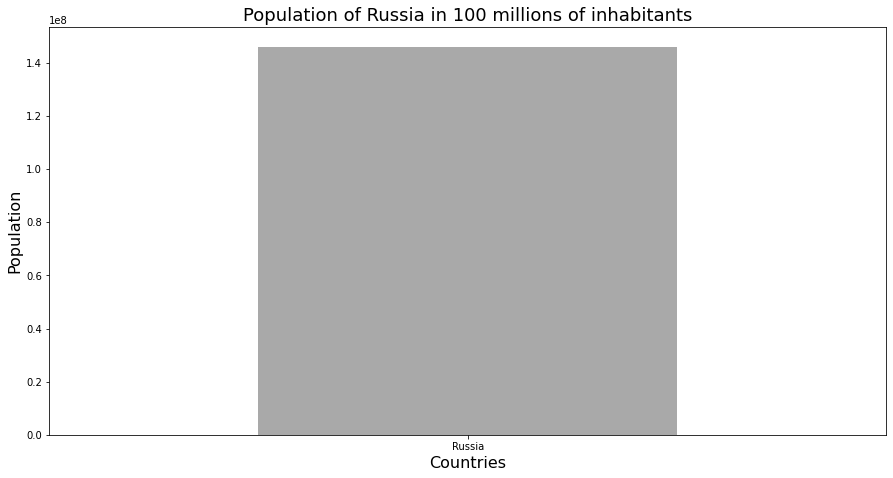

In [37]:
data_eu_asia_plot = data_eu_asia.set_index(data_eu_asia.Country)
fig = data_eu_asia_plot['Population'].iloc[:5].plot.bar(color = '#A9A9A9', rot = 0)
fig.set_title('Population of Russia in 100 millions of inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

### <font color=green>e. Asia / Europe</font>
***

In [38]:
data_asia_eu = dataset[dataset['Region'].isin(['Asia,Europe'])]

In [39]:
x = []
for i in range(data_asia_eu.shape[0]):
  x.append(i + 1)

In [40]:
data_asia_eu.index = x
data_asia_eu.columns.name = 'Rank Asia/Eu'
data_asia_eu['Asia/Eu Percentage'] = ((data_asia_eu['Population'] / data_asia_eu['Population'].sum()) * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
data_asia_eu.head()

Rank Asia/Eu,Country,Region,Population,World Percentage,Asia/Eu Percentage
1,Turkey,"Asia,Europe",83614362,1.07,100.0


In [42]:
data_asia_eu.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Asia-Europe Population.csv', index = False)

Text(0, 0.5, 'Population')

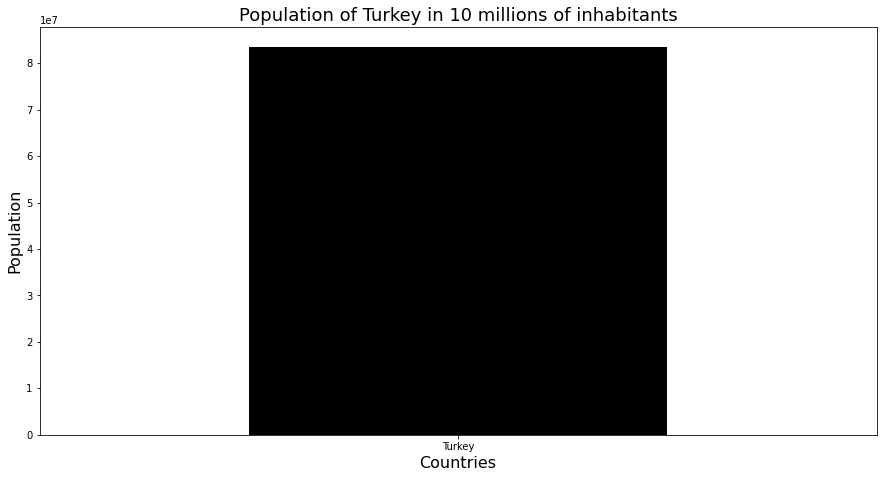

In [43]:
data_asia_eu_plot = data_asia_eu.set_index(data_asia_eu.Country)
fig = data_asia_eu_plot['Population'].iloc[:5].plot.bar(color = '#000000', rot = 0)
fig.set_title('Population of Turkey in 10 millions of inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

### <font color=green>f. Europe</font>
***

In [44]:
data_europe = dataset[dataset['Region'].isin(['Europe'])]

In [45]:
x = []
for i in range(data_europe.shape[0]):
  x.append(i + 1)

In [46]:
data_europe.index = x
data_europe.columns.name = 'Rank Europe'
data_europe['Europe Percentage'] = ((data_europe['Population'] / data_europe['Population'].sum()) * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
data_europe.head()

Rank Europe,Country,Region,Population,World Percentage,Europe Percentage
1,Germany,Europe,83129285,1.07,13.83
2,France,Europe,67505000,0.87,11.23
3,United Kingdom,Europe,67081234,0.86,11.16
4,Italy,Europe,59097904,0.76,9.84
5,Spain,Europe,47394223,0.61,7.89


In [48]:
data_europe.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Europe Population.csv', index = False)

Text(0, 0.5, 'Population')

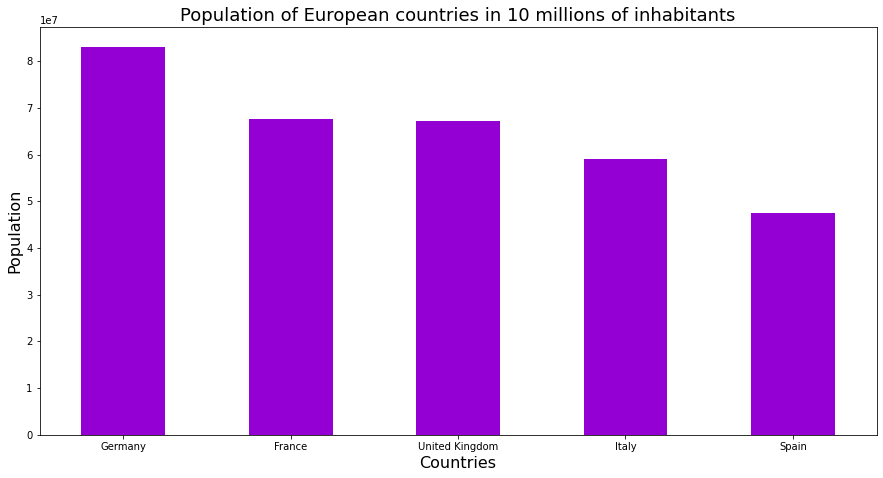

In [49]:
data_europe_plot = data_europe.set_index(data_europe.Country)
fig = data_europe_plot['Population'].iloc[:5].plot.bar(color = '#9400D3', rot = 0)
fig.set_title('Population of European countries in 10 millions of inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

### <font color=green>g. Oceania</font>
***

In [50]:
data_oceania = dataset[dataset['Region'].isin(['Oceania'])]

In [51]:
x = []
for i in range(data_oceania.shape[0]):
  x.append(i + 1)

In [52]:
data_oceania.index = x
data_oceania.columns.name = 'Rank Oceania'
data_oceania['Oceania Percentage'] = ((data_oceania['Population'] / data_oceania['Population'].sum()) * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
data_oceania.head()

Rank Oceania,Country,Region,Population,World Percentage,Oceania Percentage
1,Australia,Oceania,25922849,0.33,59.44
2,PapuaNewGuinea,Oceania,9122994,0.12,20.92
3,NewZealand,Oceania,5134950,0.07,11.77
4,Fiji,Oceania,898402,0.01,2.06
5,Solomon Islands,Oceania,728041,0.01,1.67


In [54]:
data_oceania.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Oceania Population.csv', index = False)

Text(0, 0.5, 'Population')

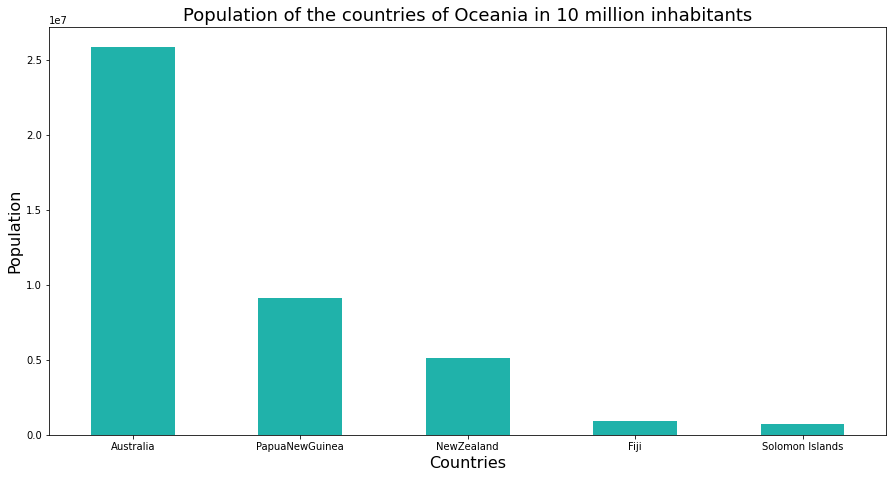

In [55]:
data_oceania_plot = data_oceania.set_index(data_oceania.Country)
fig = data_oceania_plot['Population'].iloc[:5].plot.bar(color = '#20B2AA', rot = 0)
fig.set_title('Population of the countries of Oceania in 10 million inhabitants', fontsize = 18)
fig.set_xlabel('Countries', fontsize = 16)
fig.set_ylabel('Population', fontsize = 16)

### <font color=green>h. Briefly</font>
***

In [56]:
dataset['Region'].drop_duplicates().index

Int64Index([1, 3, 7, 9, 18, 19, 53], dtype='int64')

In [57]:
select = dataset.index.isin(dataset['Region'].drop_duplicates().index)

In [58]:
most_pop_countries = dataset[select]

In [59]:
most_pop_countries.columns.name = 'World Rank'
most_pop_countries

World Rank,Country,Region,Population,World Percentage
1,China,Asia,1411778724,18.12
3,United States,Americas,332960297,4.27
7,Nigeria,Africa,211401000,2.71
9,Russia,"Europe,Asia",146171015,1.88
18,Turkey,"Asia,Europe",83614362,1.07
19,Germany,Europe,83129285,1.07
53,Australia,Oceania,25922849,0.33


## <font color=green>2.3. What is the percentage of the first 10 countries?</font>
***

In [60]:
top10_countries = dataset.loc[:10]

In [61]:
top10_countries

World Rank,Country,Region,Population,World Percentage
1,China,Asia,1411778724,18.12
2,India,Asia,1386141732,17.80
3,United States,Americas,332960297,4.27
4,Indonesia,Asia,271350000,3.48
5,Pakistan,Asia,225200000,2.89
6,Brazil,Americas,214143381,2.75
7,Nigeria,Africa,211401000,2.71
8,Bangladesh,Asia,171950056,2.21
9,Russia,"Europe,Asia",146171015,1.88
10,Mexico,Americas,126014024,1.62


In [65]:
top10_countries['World Percentage'].sum().round(2)

57.73